# Look at Expense Categories

This notebook will look at the various expense categories.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pickle

# set retina display -- makes plots look much better.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [14]:
DATA_DIR = '/Users/brad/Code/DS-ML-AI/MP_expenses/data/'
PICKLE_FILE = f'{DATA_DIR}expenses.pickle'
MP_PICKLE_FILE = f'{DATA_DIR}mps.pickle'
PARTY_COLOURS_FILE = f'{DATA_DIR}party_colours.pickle'
# print floats with a thousands separator and 2 decimal places.
pd.options.display.float_format = '{:,.2f}'.format


Load all the data and the party_colours dictionary for charting purposes.

In [15]:
all_data = pd.read_pickle(PICKLE_FILE)

In [19]:
with open(PARTY_COLOURS_FILE, 'rb') as part_col_file:
    party_colours = pickle.load(part_col_file)
party_colours

{'Alliance': 'grey',
 'Conservative': 'dodgerblue',
 'DUP': 'skyblue',
 'Deputy Speaker': 'grey',
 'Green': 'lawngreen',
 'Independent': 'grey',
 'Independent Labour': 'lightsalmon',
 'Labour': 'tomato',
 'Labour/Co-operative': 'salmon',
 'Liberal Democrat': 'gold',
 'Plaid Cymru': 'yellowgreen',
 'Respect': 'fuchia',
 'Scottish National Party': 'yellow',
 'Sinn Féin': 'grey',
 'Social Democratic and Labour Party': 'coral',
 'Speaker': 'grey',
 'UKIP': 'purple',
 'UUP': 'grey'}

To prepare the dataset for correlation analysis and plotting lets do the following:

- drop uneccessary columns


In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445964 entries, 0 to 1445963
Data columns (total 29 columns):
year                  1445964 non-null object
date                  1445964 non-null datetime64[ns]
claim_no              1442619 non-null object
mps_name              1445964 non-null object
mps_constituency      1445964 non-null object
category              1445964 non-null object
expense_type          1445964 non-null object
short_description     997774 non-null object
details               1000280 non-null object
journey_type          773432 non-null object
from                  318972 non-null object
to                    318966 non-null object
travel                238640 non-null object
nights                773432 non-null float64
mileage               773432 non-null float64
amount_claimed        1445964 non-null float64
amount_paid           1445964 non-null float64
amount_not_paid       1445964 non-null float64
amount_repaid         1445964 non-null float64
status

In [26]:
numerical_data = all_data.drop([
    
                           'claim_no',
                           'category',
                           'expense_type',
                           'short_description',
                           'details', 
                           'journey_type',
                           'from',
                           'to',
                           'travel',
                           'nights',
                           'mileage',
                           'reason_if_not_paid',
                           'amount_claimed',
                           'amount_not_paid',
                           'amount_repaid',
                           'status',
                           'expense_id',
                           'person_id',
                          ], 
                          axis=1 
                         )
numerical_data.head()

year       date       mps_name    mps_constituency  amount_paid  \
0  14_15 2014-01-04  Adam Holloway           Gravesham         8.90   
1  14_15 2014-01-04  Adam Holloway           Gravesham        10.00   
2  14_15 2014-01-04  Adam Holloway           Gravesham        18.90   
3  14_15 2014-01-04  Adrian Bailey  West Bromwich West      -630.77   
4  14_15 2014-01-04  Adrian Bailey  West Bromwich West     1,408.00   

                 party date_of_birth           area  dist_from_parl  \
0         Conservative    1965-01-01 104,958,775.62           37.66   
1         Conservative    1965-01-01 104,958,775.62           37.66   
2         Conservative    1965-01-01 104,958,775.62           37.66   
3  Labour/Co-operative    1945-12-11  27,492,062.87          173.72   
4  Labour/Co-operative    1945-12-11  27,492,062.87          173.72   

   is_travel   expense_mapping  
0       True  public transport  
1       True           parking  
2       True           mileage  
3      False      accomodation  
4      False      accomodation

## TODO -- move this to a new workbook -- Create an aggregated dataset

This dataset is too large for some charts, so lets aggregate.

In [35]:
numerical_data.groupby(by=['year','party','mps_name','mps_constituency','date','expense_mapping'], squeeze=True).sum()

amount_paid  \
year  party    mps_name    mps_constituency           date       expense_mapping                
10_11 Alliance Naomi Long  Belfast East               2010-01-09 utilities              64.00   
                                                      2010-01-10 phone                  28.78   
                                                                 utilities              64.00   
                                                      2010-01-11 phone                  34.53   
                                                                 utilities              64.00   
                                                      2010-01-12 phone                  34.17   
                                                                 utilities              64.00   
                                                      2010-02-12 accomodation        1,430.00   
                                                      2010-03-11 phone                  42.30   
                                                      2010-05-24 hotel                 260.00   
                                                      2010-06-07 hotel                 130.00   
                                                      2010-06-14 hotel                 260.00   
                                                      2010-06-28 hotel                 228.00   
                                                      2010-07-06 hotel                 241.28   
                                                      2010-07-09 phone                  61.65   
                                                      2010-07-13 phone                  43.60   
                                                      2010-07-26 hotel                 130.00   
                                                      2010-08-11 office sundries       127.08   
                                                      2010-08-23 utilities              14.00   
                                                      2010-08-31 phone                  33.77   
                                                                 television            145.50   
                                                      2010-09-08 accomodation        1,606.25   
                                                      2010-09-09 accomodation        1,430.00   
                                                                 utilities              14.00   
                                                      2010-09-11 accomodation        1,430.00   
                                                                 utilities              14.00   
                                                      2010-09-12 utilities              14.00   
                                                      2010-09-26 tax                   332.03   
                                                      2010-10-08 phone                  50.38   
                                                      2010-10-12 phone                  54.11   
...                                                                                       ...   
17_18 UUP      Tom Elliott Fermanagh and South Tyrone 2017-05-31 phone                  48.06   
                                                      2017-06-07 rent (offices)        325.00   
                                                      2017-06-14 phone                  80.36   
                                                      2017-06-15 mileage                81.00   
                                                                 misc travel         2,449.33   
                                                      2017-06-16 stationery            284.64   
                                                      2017-06-17 mileage                40.50   
                                                      2017-06-19 mileage                19.80   
                                                      2017-06-22 mileage                40.50   
        

Lets now apply one-hot encoding to the party field....

In [24]:
# numerical_data = pd.concat([numerical_data, pd.get_dummies(numerical_data['party'], prefix='party')], axis=1)
# numerical_data.drop(['party'], axis=1, inplace=True)
# numerical_data.head()

And similarly, to the expense_mapping field....

In [8]:
# numerical_data = pd.concat([numerical_data, pd.get_dummies(numerical_data['expense_mapping'], prefix='exp_map')], axis=1)
# numerical_data.drop(['expense_mapping'], axis=1, inplace=True)
# numerical_data.head()

In [25]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445964 entries, 0 to 1445963
Data columns (total 10 columns):
year               1445964 non-null object
date               1445964 non-null datetime64[ns]
mps_name           1445964 non-null object
amount_paid        1445964 non-null float64
party              1383320 non-null object
date_of_birth      739801 non-null datetime64[ns]
area               1432648 non-null float64
dist_from_parl     1445964 non-null float64
is_travel          1445964 non-null bool
expense_mapping    1445964 non-null object
dtypes: bool(1), datetime64[ns](2), float64(3), object(4)
memory usage: 100.7+ MB


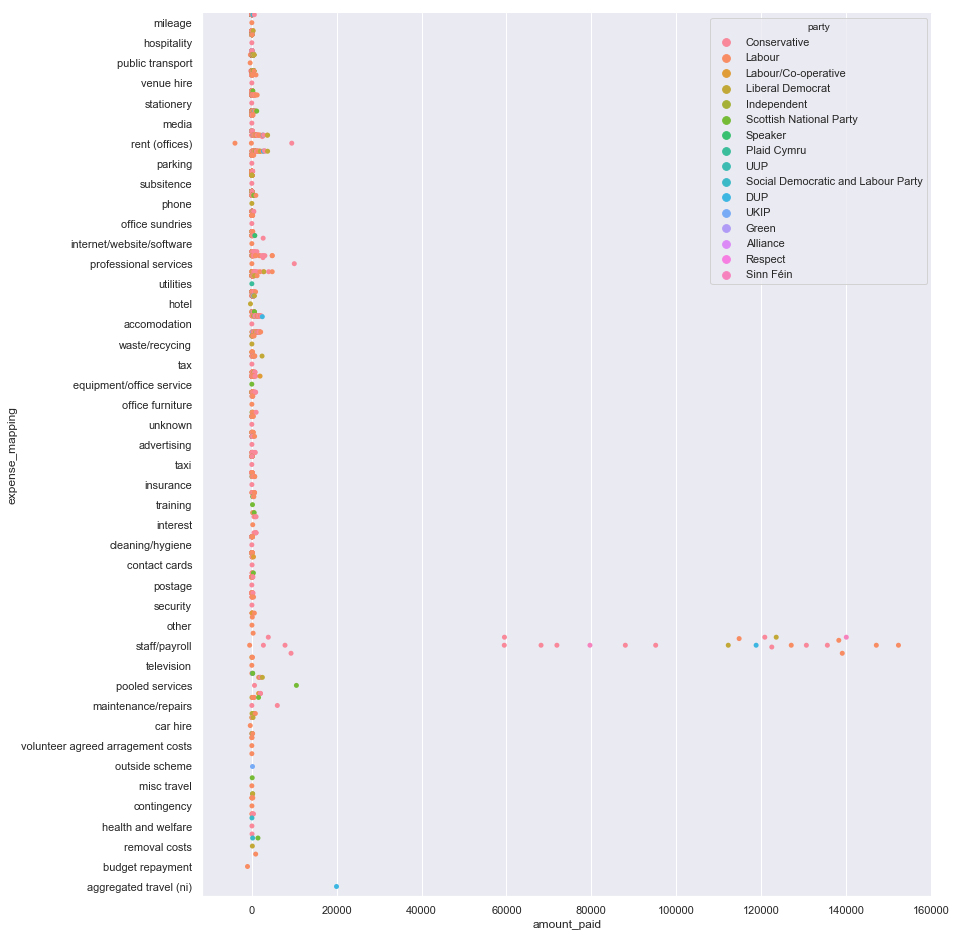

In [12]:
sns.set()
g = sns.catplot(y='expense_mapping',
                x='amount_paid', 
                hue='party',
                ci=None,
                kind='swarm',
                data=numerical_data.sample(frac=0.0035),
                legend_out=False,
                dodge=False,
               )

g.fig.set_size_inches(30,15)
